# Ex1: Linear Regression
Machine Learning Online Class - Exercise 1: Linear Regression
## ===================== Part 1: Basic Function ======================
Complete warmUpExercise.py

In [2]:
from pathlib import *
%run ../cs229config.py
exppath = str(PurePath(cs229basepath(),'machine-learning-ex1','ex1'))
print("CS229:"+exppath)

CS229:/media/curie/Windows7_OS/data/网络资源-吴恩达机器学习课程/编程作业/machine-learning-ex1/ex1


In [1]:
# !pip install mathjax # local latex support
# !pip install katex

In [3]:
print('Running warmUpExercise ... ')
print('5x5 Identity Matrix: ')
%run warmUpExercise.py

Running warmUpExercise ...
5x5 Identity Matrix: 
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
Program paused. Press enter to continue.


## ========================= Part 2: Plotting ========================

Plotting Data ...
Program paused. Press enter to continue.


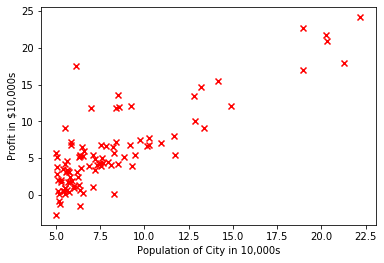

In [4]:
import pandas as pd
print('Plotting Data ...')
data = pd.read_csv(PurePath(exppath,'ex1data1.txt'),header=None)
X = data.iloc[:,0]
y = data.iloc[:,1]
m = len(y) # number of training examples
# X.name = 'X'
# y.name = 'Y'
# print(X.head())
# print(y.head())
m = y.shape[0] # number of training examples
# Plot Data
# Note: You have to complete the code in plotData.py
# %run plotData.py
import matplotlib.pyplot as plt
from plotData import plotData # cs229
%matplotlib inline
plotData(X,y)
plt.ylabel('Profit in $10,000s') # Set the y−axis label
plt.xlabel('Population of City in 10,000s') # Set the x−axis label
print('Program paused. Press enter to continue.')

## =============== Part 3: Cost and Gradient descent =================

In [5]:
import numpy as np
m = len(y) # number of training examples
X = np.column_stack((np.ones(m),X)) # Add a column of ones to x
theta = np.zeros((2,1)) # initialize fitting parameters

# Some gradient descent settings
iterations = 1500
alpha = 0.01
print('Testing the cost function ...')

Testing the cost function ...


%%latex

The objective of linear regression is to minimize the cost function
\begin{align}
J(\theta)=\frac{1}{2m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2 
\end{align}
where the hypothesis is given by the linear model 
\begin{align}
h_\theta(x)=\theta^{T}x=\theta_0+\theta_1x_1
\end{align}

In [16]:
# compute and display initial cost
# %run computeCost.py
from computeCost import computeCost # cs229
J = computeCost(X, y, theta)
print('With theta = [0 ; 0]\nCost computed = {cost:.2f}\n'. format(cost=J))
print('Expected cost value (approx) 32.07\n')

With theta = [0 ; 0]
Cost computed = 4.48

Expected cost value (approx) 32.07



In [17]:
# further testing of the cost function
J = computeCost(X, y, np.array([[-1],[2]]))
print('\nWith theta = [-1 ; 2]\nCost computed = {cost:.2f}\n'.format(cost=J))
print('Expected cost value (approx) 54.24')
print('Program paused. Press enter to continue.')


With theta = [-1 ; 2]
Cost computed = 54.24

Expected cost value (approx) 54.24
Program paused. Press enter to continue.


%%latex

the parameters of your model are the $\theta_j$ values. These are the values you will adjust to minimize cost $J(\theta)$.
In batch gradient descent, each iteration performs the update
\begin{align}
\theta_j := \theta_j - \alpha\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}
\end{align}

In [18]:
print('Running Gradient Descent ...')
from gradientDescent import gradientDescent # cs229
# %run gradient_Descent.py
[theta,J_history] = gradientDescent(X, y, theta, alpha, iterations)
theta

Running Gradient Descent ...


array([[-3.87805118],
       [ 1.1912525 ]])

In [19]:
# print theta to screen
print('Theta found by gradient descent:\n')
print(' {theta0:.4f}\n  {theta1:.4f}'.format(theta0=theta[0][0],theta1=theta[1][0]))
print('\nExpected theta values (approx)\n')
print(' -3.6303\n  1.1664\n\n')

Theta found by gradient descent:

 -3.8781
  1.1913

Expected theta values (approx)

 -3.6303
  1.1664




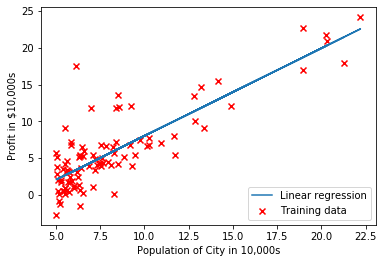

In [20]:
# Plot the linear fit
# [【转】matplotlib制图——图例legend](https://www.cnblogs.com/xianhan/p/10428184.html)
fig1 = plt.scatter(X[:,1],y,c='r',marker='x',linewidths=10,label='Training data')
fig2 = plt.plot(X[:,1],np.dot(X,theta),label='Linear regression')
plt.ylabel('Profit in $10,000s') # Set the y−axis label
plt.xlabel('Population of City in 10,000s') # Set the x−axis label
# 'Training data','Linear regression'
plt.legend(loc=4,ncol=1)

In [21]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot([1,3.5],theta)[0]
print('For population = 35,000, we predict a profit of {:.2f}'.format(predict1*10000));
predict2 = np.dot([1,7],theta)[0]
print('For population = 70,000, we predict a profit of {:.2f}\n'.format(predict2*10000));
print('Program paused. Press enter to continue.\n')

For population = 35,000, we predict a profit of 2913.33
For population = 70,000, we predict a profit of 44607.16

Program paused. Press enter to continue.



## ============= Part 4: Visualizing J(theta_0, theta_1) =============

In [22]:
print('Visualizing J(theta_0, theta_1) ...')
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((len(theta0_vals),len(theta1_vals)))

Visualizing J(theta_0, theta_1) ...


In [23]:
# Fill out J_vals
X_t0, Y_t1 = np.meshgrid(theta0_vals, theta1_vals)
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        # t = np.array([theta0_vals[i],theta1_vals[j]]).reshape(-1,1)
        t = np.array([theta0_vals[i],theta1_vals[j]]).reshape(2,1)
        J_vals[i][j] = computeCost(X,y,t)
#  Because of the way meshgrids work in the surf command, we need to
#  transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.transpose()

Text(0.5, 0, '$\\theta_1$')

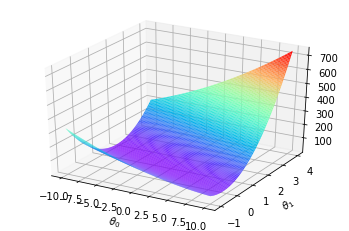

In [24]:
%matplotlib inline
# Surface plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
# ax = plt.axes(projection = '3d')
ax = fig.gca(projection='3d')
# 将原始数据变成网格数据形式
X_t0, Y_t1 = np.meshgrid(theta0_vals, theta1_vals)
# ax.plot_surface(theta0_vals,theta1_vals,J_vals)
ax.plot_surface(X_t0,Y_t1,J_vals, rstride=1, cstride=1,  antialiased=True,cmap = "rainbow" )
# [cmap是颜色映射表](https://blog.csdn.net/ygdxt/article/details/86618606)
# [python matplotlib contour画等高线图](https://blog.csdn.net/Mr_Cat123/article/details/80677525)
# https://morvanzhou.github.io/tutorials/data-manipulation/plt/3-5-3d/
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')

Text(0, 0.5, '$\\theta_1$')

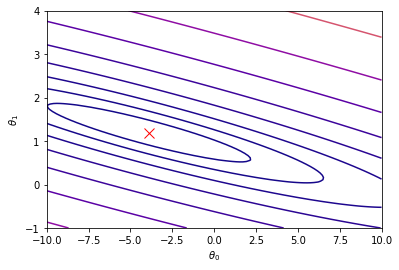

In [27]:
%matplotlib inline
# Contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
lvls = np.logspace(-2,3,20)
# plt.contour(theta0_vals,theta1_vals,J_vals,levels=lvls)
plt.contour(theta0_vals,theta1_vals,J_vals,np.logspace(-2,3,num=20),cmap=plt.cm.plasma)
plt.plot(theta[0],theta[1],'rx',markersize=10,linewidth=2)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')